# Task 9: Handwritten Equation Solver using CNN

In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import pickle

In [2]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [3]:
data=[]
data=load_images_from_folder('C:/Users/Lenovo/Downloads/archive/extracted_images/-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))

33997


In [4]:
data0=load_images_from_folder('C:/Users/Lenovo/Downloads/archive/extracted_images/+')
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

59109


In [5]:
data1=load_images_from_folder('C:/Users/Lenovo/Downloads/archive/extracted_images/!')
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

60409


In [6]:
data2=load_images_from_folder('C:/Users/Lenovo/Downloads/archive/extracted_images/(')
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

74703


In [7]:
data3=load_images_from_folder('C:/Users/Lenovo/Downloads/archive/extracted_images/)')
for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

89058


In [8]:
data4=load_images_from_folder('C:/Users/Lenovo/Downloads/archive/extracted_images/,')
for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

90964


In [9]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

In [10]:
data = pd.read_csv('train_handwritten.csv',index_col=False)
labels = data[['78']]

In [11]:
data.drop(data.columns[[78]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10


In [12]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [13]:
labels=np.array(labels)

In [14]:
from keras.utils import to_categorical
cat=to_categorical(labels,num_classes=0)

In [15]:
print(cat[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10


In [17]:
data.shape

(90964, 784)

In [18]:
temp=data.to_numpy()

In [19]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [20]:
temp.shape[0]

90964

In [21]:
X_train.shape

(90964, 28, 28, 1)

In [22]:
l=[]
for i in range(14326):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

In [23]:
np.random.seed(7)

In [24]:
len(l[0])

1

In [25]:
X_train.shape

(90964, 28, 28, 1)

In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

In [28]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model.save_weights("model_final.h5")

INFO:tensorflow:Assets written to: ram://f6819cd2-49e7-4a6f-8e69-fd6381d904c6/assets


INFO:tensorflow:Assets written to: ram://f6819cd2-49e7-4a6f-8e69-fd6381d904c6/assets


In [32]:
import cv2
import numpy as np
img = cv2.imread('eq1.jpg',cv2.IMREAD_GRAYSCALE)

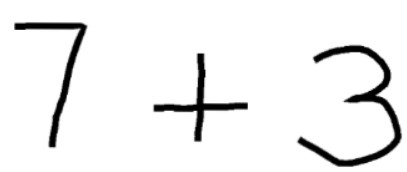

In [33]:
from IPython.display import Image
Image(filename='eq1.jpg') 

In [34]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

3
[[14, 23, 73, 124], [154, 53, 94, 88], [298, 46, 103, 121]]
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
0
[[14, 23, 73, 124], [154, 53, 94, 88], [298, 46, 103, 121]]


In [35]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'
    
print(equation)

1/1 [==============================] - 0s 19ms/step
888


In [36]:
eval(equation)

888